In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("Titanic_train.csv",index_col=0)
df_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df_test = pd.read_csv("Titanic_test.csv",index_col=0)
df_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Remove unwanted column

In [4]:
train_dataset = df_train.drop(columns=["Name","Ticket","Cabin"])
train_dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C


In [5]:
test_dataset = df_test.drop(columns=["Name","Ticket","Cabin"])
test_dataset.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S


# EDA for train_dataset

In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [7]:
train_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_dataset.shape

(891, 8)

##### Missing Value Detection

In [9]:
train_dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
def outlier_detection(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3-q1
    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)
    return lower_extreme, upper_extreme, q1,q3

print(outlier_detection(train_dataset,"Age"))

print(train_dataset[train_dataset["Age"] > 65].shape[0])

(-6.6875, 64.8125, 20.125, 38.0)
8


##### Missing Value Imputation

In [11]:
train_dataset["Age"].fillna(train_dataset["Age"].median(), inplace=True)  # Due to outlier available

In [12]:
train_dataset["Embarked"].fillna(train_dataset["Embarked"].mode()[0], inplace=True)

In [13]:
train_dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### Removal of Dupliication

In [14]:
train_dataset.duplicated().sum()

116

In [15]:
train_dataset.drop_duplicates(inplace=True, ignore_index=True)
train_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
770,0,3,female,39.0,0,5,29.1250,Q
771,1,1,female,19.0,0,0,30.0000,S
772,0,3,female,28.0,1,2,23.4500,S
773,1,1,male,26.0,0,0,30.0000,C


In [16]:
train_target = train_dataset["Survived"]

In [17]:
train_dataset.drop(columns='Survived', inplace=True)

In [18]:
train_dataset.shape

(775, 7)

### Labeling of Train dataset 

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_dataset["Sex"] = le.fit_transform(train_dataset["Sex"])
train_dataset["Embarked"] = le.fit_transform(train_dataset["Embarked"])
train_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### Scaling of train dataset

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_train = pd.DataFrame(ss.fit_transform(train_dataset), columns=train_dataset.columns)
new_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.883385,0.777531,-0.551060,0.475876,-0.500754,-0.527515,0.589252
1,-1.461216,-1.286122,0.611945,0.475876,-0.500754,0.695086,-1.892652
2,0.883385,-1.286122,-0.260308,-0.534545,-0.500754,-0.514627,0.589252
3,-1.461216,-1.286122,0.393881,0.475876,-0.500754,0.347909,0.589252
4,0.883385,0.777531,0.393881,-0.534545,-0.500754,-0.512240,0.589252


# EDA for test_dataset

In [21]:
test_dataset.duplicated().sum()

38

In [22]:
test_dataset.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S


In [23]:
test_dataset.drop_duplicates(inplace=True, ignore_index=True)

In [24]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    380 non-null    int64  
 1   Sex       380 non-null    object 
 2   Age       322 non-null    float64
 3   SibSp     380 non-null    int64  
 4   Parch     380 non-null    int64  
 5   Fare      379 non-null    float64
 6   Embarked  380 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.9+ KB


In [25]:
test_dataset.describe()

,Pclass,Age,SibSp,Parch,Fare
count,380.000000,322.000000,380.000000,380.000000,379.000000
mean,2.218421,30.324534,0.484211,0.431579,38.152946
std,0.851618,14.370820,0.925889,1.021176,58.020997
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.925000
50%,2.000000,27.500000,0.000000,0.000000,15.245800
75%,3.000000,39.750000,1.000000,0.000000,36.877100
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [26]:
test_dataset.shape

(380, 7)

In [27]:
test_dataset.isnull().sum()

Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [28]:
def outlier_detection(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3-q1
    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)
    return lower_extreme, upper_extreme, q1,q3

print(outlier_detection(test_dataset,"Age"))

print(test_dataset[test_dataset["Age"] > 67].shape[0])

(-7.125, 67.875, 21.0, 39.75)
1


In [29]:
test_dataset["Age"].fillna(train_dataset["Age"].mean(), inplace=True)  

In [30]:
test_dataset["Fare"].fillna(train_dataset["Fare"].median(), inplace=True)

In [31]:
test_dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
test_dataset.shape

(380, 7)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_dataset["Sex"] = le.fit_transform(test_dataset["Sex"])
test_dataset["Embarked"] = le.fit_transform(test_dataset["Embarked"])
test_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


### Labeling of test dataset 

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_dataset["Sex"] = le.fit_transform(test_dataset["Sex"])
test_dataset["Embarked"] = le.fit_transform(test_dataset["Embarked"])
test_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


### Scalling of Test Dataset 

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_test = pd.DataFrame(ss.fit_transform(train_dataset), columns=train_dataset.columns)
new_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.883385,0.777531,-0.551060,0.475876,-0.500754,-0.527515,0.589252
1,-1.461216,-1.286122,0.611945,0.475876,-0.500754,0.695086,-1.892652
2,0.883385,-1.286122,-0.260308,-0.534545,-0.500754,-0.514627,0.589252
3,-1.461216,-1.286122,0.393881,0.475876,-0.500754,0.347909,0.589252
4,0.883385,0.777531,0.393881,-0.534545,-0.500754,-0.512240,0.589252


## Visulization

In [36]:
train_dataset.shape,test_dataset.shape

((775, 7), (380, 7))

In [37]:
train_dataset.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.25,2


In [38]:
test_dataset.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1


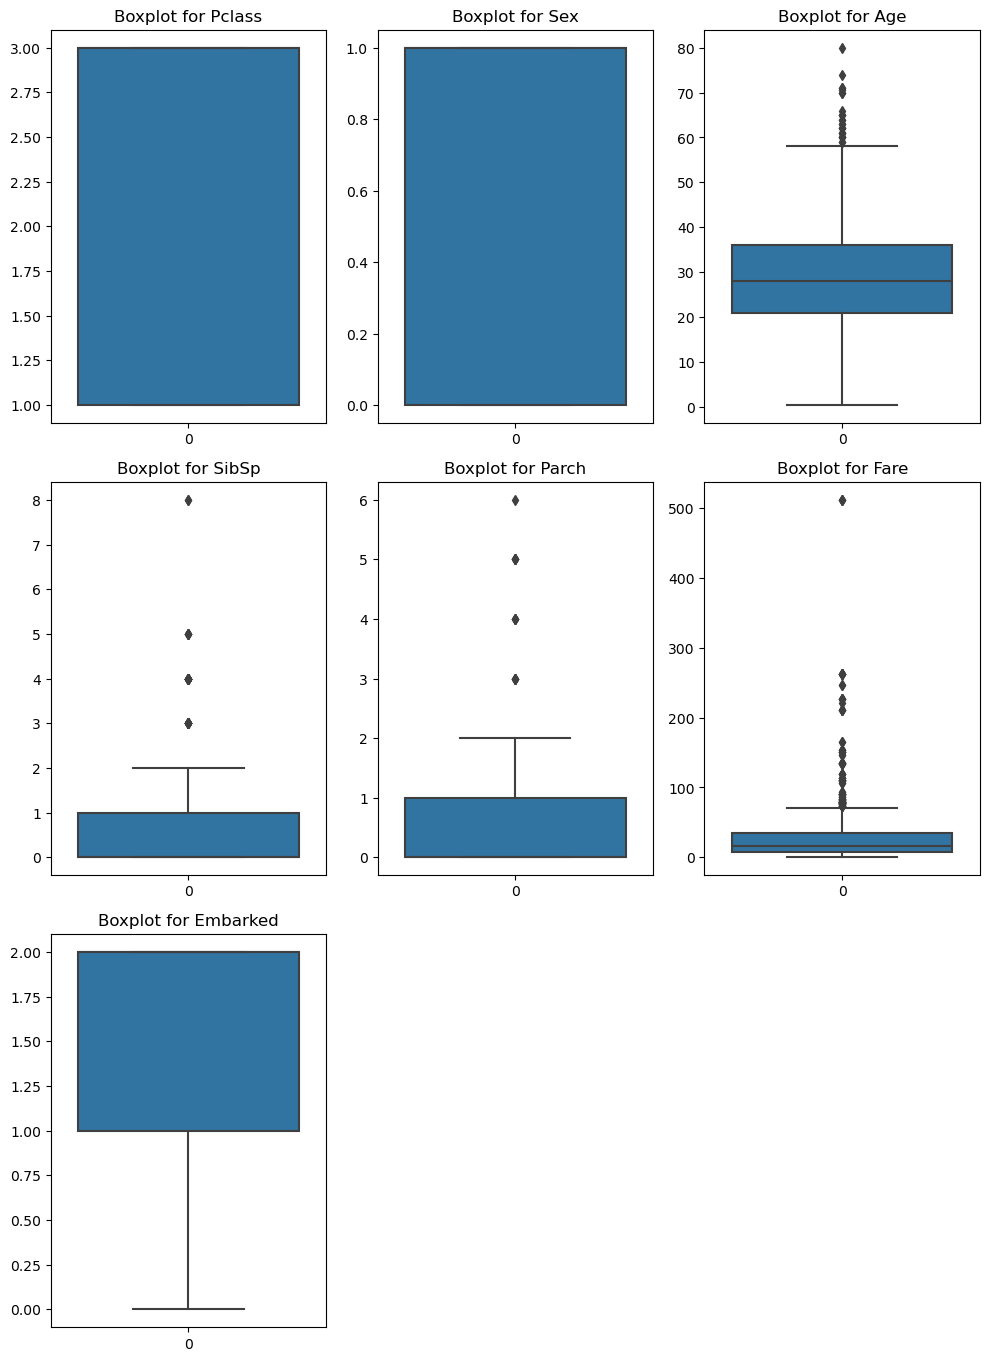

In [39]:
import matplotlib.pyplot as plt


fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(10,18))

axs = axs.flatten()

# Plot boxplots for each column in the DataFrame
for i, column in enumerate(train_dataset.columns):
    sns.boxplot(train_dataset[column], ax=axs[i])
    axs[i].set_title(f'Boxplot for {column}')

# Remove any unused subplots
for i in range(len(train_dataset.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


## Model Building

### Model - 1

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(new_train,train_target)

LogisticRegression()

#### Training Data Prediction

In [43]:
new_train_predeicted = model.predict(new_train)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, classification_report

In [45]:
confusion_metrics_train = confusion_matrix(train_target,new_train_predeicted)
confusion_metrics_train
print(confusion_metrics_train)

[[372  83]
 [ 93 227]]


In [46]:
train_acc = accuracy_score(train_target,new_train_predeicted)
print("Training Accuracy ",train_acc)
precision = precision_score(train_target,new_train_predeicted)
print("Training precision",precision)
recall = recall_score(train_target,new_train_predeicted)
print("Training recall   ",recall)
f1 = f1_score(train_target,new_train_predeicted)
print("Training f1 score ",f1)


Training Accuracy  0.7729032258064517
Training precision 0.7322580645161291
Training recall    0.709375
Training f1 score  0.7206349206349206


# Please correct this heatmap also

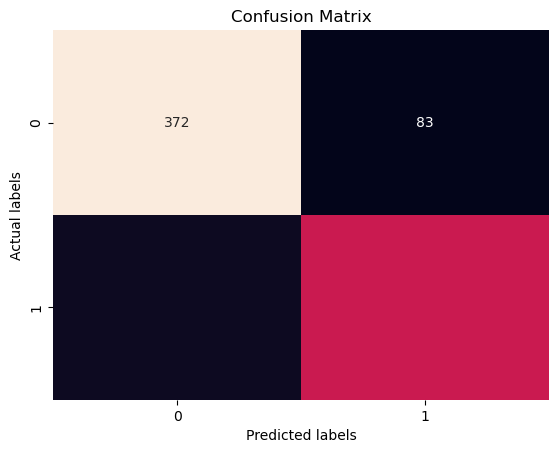

In [47]:
ax= plt.subplot()
sns.heatmap(confusion_metrics_train,annot=True,  fmt='g', ax=ax, cbar = False);  #annot=True to annotate cells, ftm='g' to disable scientific notation
#sns.heatmap(confusion_metrics_train, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1



In [48]:
print(classification_report(train_target,new_train_predeicted))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       455
           1       0.73      0.71      0.72       320

    accuracy                           0.77       775
   macro avg       0.77      0.76      0.76       775
weighted avg       0.77      0.77      0.77       775



In [49]:
actual_vs_predicted = pd.DataFrame({'actual': train_target,
                         'predicted': new_train_predeicted})
actual_vs_predicted.head(2)

,actual,predicted
0,0,0
1,1,1


## Actual Output 

In [50]:
(actual_vs_predicted["actual"]==0).sum()

455

In [51]:
(actual_vs_predicted["actual"]==1).sum()

320

### "actual" and "predicted"== 1    True Positive Condition

In [52]:
len(actual_vs_predicted[(actual_vs_predicted["actual"]== 1) & (actual_vs_predicted["predicted"]==1)])

227

### "actual" and "predicted"== 0    True Nagative Condition

In [53]:
len(actual_vs_predicted[(actual_vs_predicted["actual"]== 0) & (actual_vs_predicted["predicted"]==0)])

372

## Improve Model Using Ensemble Technic

## Model - 2

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
bag_class= BaggingClassifier(estimator= LogisticRegression(),bootstrap=True, max_features=2, max_samples=20)

In [56]:
bag = bag_class.fit(new_train,train_target)
bag

BaggingClassifier(estimator=LogisticRegression(), max_features=2,
                  max_samples=20)

In [57]:
y_pred_train = bag.predict(new_train)

In [58]:
train_acc = accuracy_score(train_target,y_pred_train)
print("Training Accuracy ",train_acc)
precision = precision_score(train_target,y_pred_train)
print("Training precision",precision)
recall = recall_score(train_target,y_pred_train)
print("Training recall   ",recall)
f1 = f1_score(train_target,y_pred_train)
print("Training f1 score ",f1)


Training Accuracy  0.6812903225806451
Training precision 0.7552447552447552
Training recall    0.3375
Training f1 score  0.46652267818574517


In [59]:
print(classification_report(train_target,y_pred_train))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       455
           1       0.76      0.34      0.47       320

    accuracy                           0.68       775
   macro avg       0.71      0.63      0.62       775
weighted avg       0.70      0.68      0.65       775



In [60]:
confusion_metrics_train_bag = confusion_matrix(train_target,y_pred_train)
confusion_metrics_train_bag

array([[420,  35],
       [212, 108]], dtype=int64)

In [61]:
actual_vs_predicted_bag = pd.DataFrame({'actual': train_target,
                         'predicted': y_pred_train})
actual_vs_predicted_bag.head(2)

,actual,predicted
0,0,0
1,1,1


### "actual" and "predicted"== 1    True Positive Condition

In [62]:
len(actual_vs_predicted_bag[(actual_vs_predicted_bag["actual"]== 1) & (actual_vs_predicted_bag["predicted"]==1)])

108

### "actual" and "predicted"== 0    True Nagative Condition

In [63]:
len(actual_vs_predicted_bag[(actual_vs_predicted_bag["actual"]== 0) & (actual_vs_predicted_bag["predicted"]==0)])

420

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


base_estimator = LogisticRegression(max_iter=1000)

# Define parameters grid
parameters = {
    'n_estimators': [2,5,7,10,20, 50, 100],
    'max_samples': [0.3,0.5, 0.7, 1.0],
    'max_features': [0.3,0.5, 0.7, 1.0]
}

# Initialize BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator)

# Initialize GridSearchCV
grid_search = GridSearchCV(bagging_classifier, parameters, cv=5)

# Perform grid search
grid_search.fit(new_train,train_target)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 100}
Best Score: 0.7819354838709678


# Model 3---------  Final Model

In [66]:
from sklearn.datasets import make_classification
# Generate some example data (replace this with your actual dataset)
new_train,train_target = make_classification(n_samples=1000, n_features=7, n_classes=2, random_state=42)
# Define the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Define the hyperparameters grid to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(new_train,train_target)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
print(best_model)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, max_iter=1000)


In [67]:
best_logistic_regression = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
best_logistic_regression.fit(new_train,train_target)
y_train_predict = best_logistic_regression.predict(new_train)
y_test_predict = best_logistic_regression.predict(new_test)

In [68]:
confusion_metrics_tuning = confusion_matrix(train_target,y_train_predict)
confusion_metrics_tuning

array([[433,  64],
       [ 74, 429]], dtype=int64)

In [69]:
train_acc = accuracy_score(train_target,y_train_predict)
print("Training Accuracy ",train_acc)
precision = precision_score(train_target,y_train_predict)
print("Training precision",precision)
recall = recall_score(train_target,y_train_predict)
print("Training recall   ",recall)
f1 = f1_score(train_target,y_train_predict)
print("Training f1 score ",f1)

Training Accuracy  0.862
Training precision 0.8701825557809331
Training recall    0.852882703777336
Training f1 score  0.8614457831325302
